In [2]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Expressivity of QNN vs Classic NN

In [3]:
theta = np.linspace(0, 2*np.pi, 1000).reshape(-1,1)
x = (np.cos(theta) + 1)/2
y = (np.sin(theta) + 1)/2
x = np.hstack([x, y])
print(trajectory_length(x))

3.141587475528624


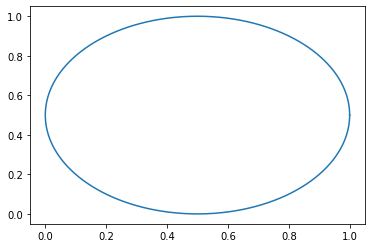

In [4]:
plt.plot(x[:,0], x[:,1])
plt.show()

## QNN

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=2, n_features=2, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=1000000)
layer2 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=1000000)
layer3 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=1000000)
layer4 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=1000000)
layer5 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=1000000)


layers = [layer1, layer2, layer3, layer4, layer5]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [ ]:
x_trans = network.predict(x, verbose=True)
network.save(data_path("network_expressivity_5_nodes"))

In [ ]:
x_trans = network_load.a[-5]
print(x_trans.shape)
print(trajectory_length(x_trans))
plt.plot(x_trans[:,0], x_trans[:,1])
plt.show()

In [ ]:
network_load = loader(data_path("network_expressivity_5_nodes"))
act = network_load.a

In [ ]:
pca = PCA(n_components=2)
comp = pca.fit_transform(act[2])
print(trajectory_length(comp))
plt.plot(comp[:,0], comp[:,1])
plt.show()

## Classic NN

In [24]:
np.random.seed(42)

layer1 = Dense(n_features=2, n_targets=5, scale = 1, activation = Sigmoid())
layer2 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid())
layer3 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid())
layer4 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid())
layer5 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid())


layers =[layer1, layer2, layer3, layer4, layer5]

optimizer = Adam()
network_clas = NeuralNetwork(layers, optimizer)

In [25]:
network_clas.predict(x)
act = network_clas.a
#print(network_clas.layers[0])

0.03626783227678493


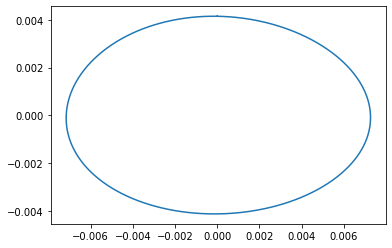

In [26]:
pca = PCA(n_components=2)
comp = pca.fit_transform(act[2])
print(trajectory_length(comp))
plt.plot(comp[:,0], comp[:,1])
plt.show()

In [ ]:
print(trajectory_length(x_trans_clas))
plt.plot(x_trans_clas[:,0], x_trans_clas[:,1])
plt.show()